In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from ROOT import TVector3
import perform_calibrations as pc #import perform calibration package to get data
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import ROOT
import array
import matplotlib
from matplotlib import rc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
rc('text', usetex=False)

Welcome to JupyROOT 6.16/00


In [2]:
t = pc.tpc_calibration()

In [3]:
recoils = t.calibrate_recoils(corrected_energy = True, corrected_length = 0)

/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

/home/jeef/workspace/jeff_workspace/calibration/perform_calibrations.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['full_corrected_energy'][index] = dataframe['saturation_corrected_energy'][index] #truncate full correction range
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeef/workspace/jeff_workspace/calibration/perform_calibrations.py:423: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeef/workspace/jeff_workspace/calibration/perform_calibrations.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

# Semi-loose x-ray veto
#### Use uncorrected energies for this, as x-rays may blend into recoil bands after correcting

In [4]:
### PERFORM CUTS
for tpc in ['iiwi', 'humu', 'nene', 'tako', 'palila', 'elepaio']:
    recoils[tpc] = recoils[tpc].loc[recoils[tpc]['track_energy']>6] #initial x-ray veto
    recoils[tpc].index = [i for i in range(0,len(recoils[tpc]))] #reindex
    # TPC QUADRATIC CUTS
    
    y = np.array([6,20,800])
    if tpc == 'iiwi':
        x = np.array([1200, 1900, 15000])
    elif tpc == 'humu':
        x = np.array([1950, 3000, 20000])
    elif tpc == 'nene':
        x = np.array([950, 1900, 15000])
    elif tpc == 'tako':
        x = np.array([1000, 1900, 15000])
    elif tpc == 'palila':
        x = np.array([1000, 1750, 15000])
    else:
        x = np.array([1050, 2000, 15000])
    cut = np.polyfit(x,y,2)
    
    recoils[tpc] = recoils[tpc].loc[ #x-ray veto quadratic cut recoil
        recoils[tpc]['track_energy'] > cut[0]*recoils[tpc]['length']**2
        +cut[1]*recoils[tpc]['length']+cut[2]] #after this cut, only recoil bands remain

### Plot uncorrected and corrected recoil bands

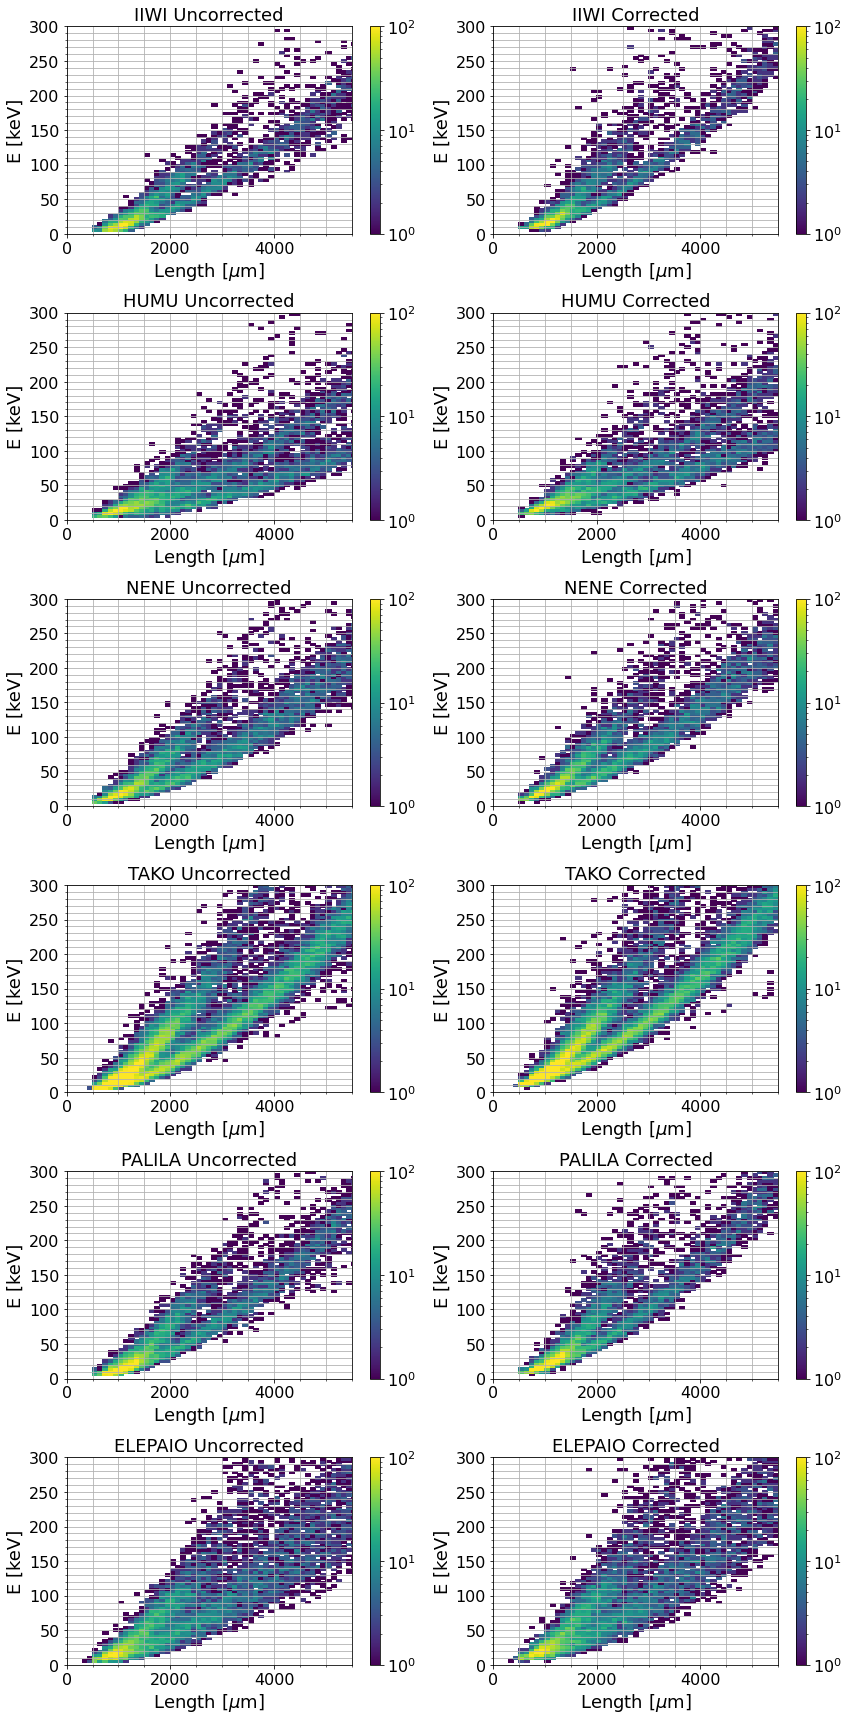

In [5]:
fig = plt.figure(figsize = (12,24))
cmap = plt.cm.viridis
cmap.set_under(color='white')
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)
    
xm = 8000
ym = 400
nbinsx = int(xm/100)
nbinsy = int(ym/4)

h = {}
image = {}

i = 1
for tpc in ['iiwi', 'humu', 'nene', 'tako', 'palila', 'elepaio']:
    p = plt.subplot(6,2,i)
    p.xaxis.set_minor_locator(AutoMinorLocator())
    p.yaxis.set_minor_locator(AutoMinorLocator())
    h[tpc + '_uncor'], xedges, yedges, image[tpc + '_uncor'] = plt.hist2d(recoils[tpc]['length'], recoils[tpc]['track_energy'], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=100))
    plt.ylim(0,300)
    plt.xlim(0,5500)
    plt.xlabel(r'Length [$\mu$m]')
    plt.ylabel('E [keV]')
    plt.title('%s Uncorrected'%(tpc.upper()))
    plt.colorbar()
    plt.grid(which = 'both')
    p = plt.subplot(6,2,i+1)
    p.xaxis.set_minor_locator(AutoMinorLocator())
    p.yaxis.set_minor_locator(AutoMinorLocator())
    h[tpc + '_cor'], xedges, yedges, image[tpc + '_cor'] = plt.hist2d(recoils[tpc]['length'], recoils[tpc]['full_corrected_energy'], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=100))
    plt.ylim(0,300)
    plt.xlim(0,5500)
    plt.xlabel(r'Length [$\mu$m]')
    plt.ylabel('E [keV]')
    plt.title('%s Corrected'%(tpc.upper()))
    plt.colorbar()
    plt.grid(which = 'both')
    i += 2

plt.tight_layout()
plt.show()

### Plot He recoil band cuts to be used as training sample for double gaussian fitter

iiwi [ 6.11111111e-06  1.18888889e-02 -2.22222222e+01] [ 8.61111111e-06  1.37222222e-02 -3.88888889e+00]
humu [ 3.33333333e-06 -2.00000000e-03  6.66666667e+00] [ 4.86111111e-06  2.76388889e-02 -1.97222222e+01]
nene [ 5.e-06  7.e-03 -6.e+00] [ 5.83333333e-06  2.98333333e-02 -2.10000000e+01]
tako [ 5.69444444e-06  8.80555556e-03 -6.38888889e+00] [ 6.66666667e-06  2.93333333e-02 -1.33333333e+01]
palila [ 6.38888889e-06  7.27777778e-03 -6.11111111e+00] [ 8.61111111e-06  2.70555556e-02 -2.05555556e+01]
elepaio [ 7.50000000e-06 -7.83333333e-03  1.66666667e+00] [ 6.66666667e-06  3.93333333e-02 -5.33333333e+01]


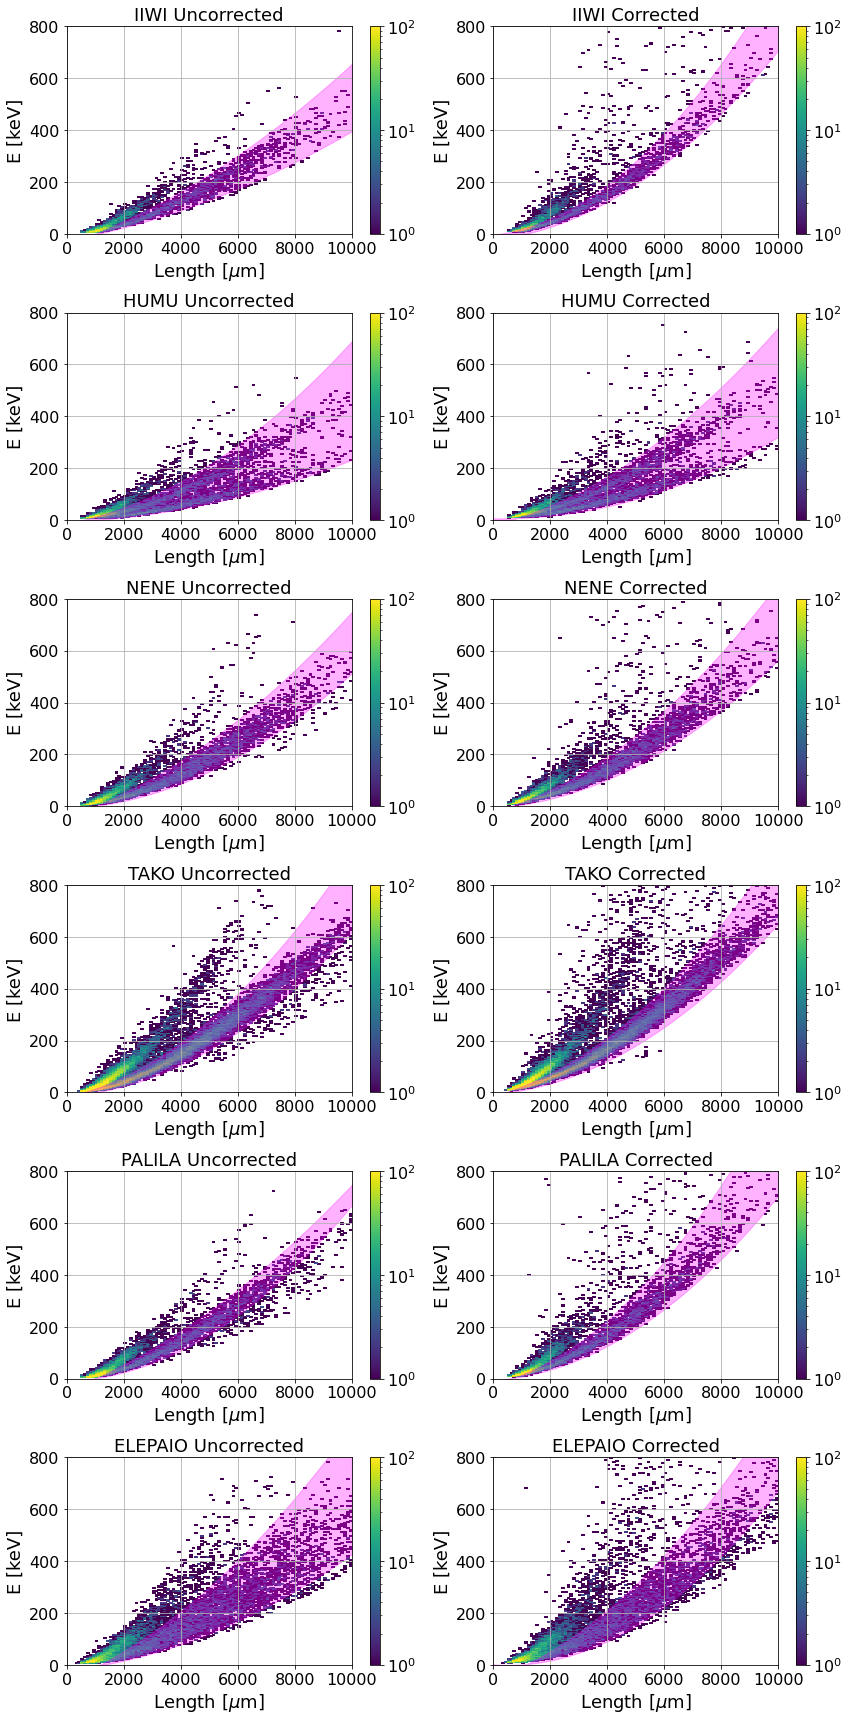

In [215]:
fig = plt.figure(figsize = (12,24))
cmap = plt.cm.viridis
cmap.set_under(color='white')
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('axes', labelsize=18)
plt.rc('axes', titlesize=18)
    
xm = 10000
ym = 800
nbinsx = int(xm/100)
nbinsy = int(ym/4)

h = {}
image = {}

x_plt = np.linspace(0,xm,xm+1)

i = 1
for tpc in ['iiwi', 'humu', 'nene', 'tako', 'palila', 'elepaio']:
    
    #UNCORRECTED RECOILS
    plt.subplot(6,2,i)
    
    x = np.array([2000, 2600, 5000])
    if tpc == 'iiwi':
        y_min = np.array([24, 42, 130])
        y_max = np.array([48, 80, 230])
    elif tpc == 'humu':
        y_min = np.array([10, 18, 64])
        y_max = np.array([48, 74, 214])
    elif tpc == 'nene':
        y_min = np.array([20, 36, 134])
        y_max = np.array([50, 84, 250])
    elif tpc == 'tako':
        y_min = np.array([24, 44, 164])
        y_max = np.array([60, 94, 280])
    elif tpc == 'palila':
        y_min = np.array([24, 44, 170])
        y_max = np.array([54, 90, 260])
    else:
        y_min = np.array([16, 32, 120])
        y_max = np.array([52, 94, 300])
        
    cut_min = np.polyfit(x,y_min,2)
    cut_max = np.polyfit(x,y_max,2)
    #print(tpc, cut_min, cut_max)
    
    h[tpc + '_uncor'], xedges, yedges, image[tpc + '_uncor'] = plt.hist2d(recoils[tpc]['length'], recoils[tpc]['track_energy'], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=100))
    plt.fill_between(x_plt, cut_min[0]*x_plt**2 + cut_min[1]*x_plt + cut_min[2],
                    cut_max[0]*x_plt**2 + cut_max[1]*x_plt + cut_max[2], color = 'magenta', alpha = 0.3)
    plt.ylim(0,ym)
    plt.xlim(0,xm)
    plt.xlabel(r'Length [$\mu$m]')
    plt.ylabel('E [keV]')
    plt.title('%s Uncorrected'%(tpc.upper()))
    plt.colorbar()
    plt.grid(which = 'both')
    
    #CORRECTED RECOILS
    plt.subplot(6,2,i+1)
    
    if tpc == 'iiwi':
        y_min = np.array([26, 50, 190])
        y_max = np.array([58, 90, 280])
    elif tpc == 'humu':
        y_min = np.array([16, 24, 80])
        y_max = np.array([55, 85, 240])
    elif tpc == 'nene':
        y_min = np.array([28, 46, 154])
        y_max = np.array([62, 96, 274])
    elif tpc == 'tako':
        y_min = np.array([34, 55, 180])
        y_max = np.array([72, 108, 300])
    elif tpc == 'palila':
        y_min = np.array([34, 56, 190])
        y_max = np.array([68, 108, 330])
    else:
        y_min = np.array([16, 32, 150])
        y_max = np.array([52, 94, 310])
        
    cut_min = np.polyfit(x,y_min,2)
    cut_max = np.polyfit(x,y_max,2)
    print(tpc, cut_min, cut_max)
    
    h[tpc + '_cor'], xedges, yedges, image[tpc + '_cor'] = plt.hist2d(recoils[tpc]['length'], recoils[tpc]['full_corrected_energy'], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=100))
    plt.fill_between(x_plt, cut_min[0]*x_plt**2 + cut_min[1]*x_plt + cut_min[2],
                    cut_max[0]*x_plt**2 + cut_max[1]*x_plt + cut_max[2], color = 'magenta', alpha = 0.3)
    plt.ylim(0,800)
    plt.xlim(0,10000)
    plt.xlabel(r'Length [$\mu$m]')
    plt.ylabel('E [keV]')
    plt.title('%s Corrected'%(tpc.upper()))
    plt.colorbar()
    plt.grid(which = 'both')
    i += 2

plt.tight_layout()
plt.show()

### Apply cuts from He recoil bands

In [149]:
def apply_He_band_cuts(df, ecor = 'corrected'): #Cuts to train double Gaussian fit
    
    #FIRST APPLY INITIAL X-RAY VETO (already done if using .ipynb)
    
    df = df.loc[df['track_energy']>6] #initial x-ray veto
    df.index = [i for i in range(0,len(df))] #reindex
    
    y = np.array([6,20,800])
    if tpc == 'iiwi':
        x = np.array([1200, 1900, 15000])
    elif tpc == 'humu':
        x = np.array([1950, 3000, 20000])
    elif tpc == 'nene':
        x = np.array([950, 1900, 15000])
    elif tpc == 'tako':
        x = np.array([1000, 1900, 15000])
    elif tpc == 'palila':
        x = np.array([1000, 1750, 15000])
    else:
        x = np.array([1050, 2000, 15000])
    cut = np.polyfit(x,y,2)
    
    df = df.loc[ #x-ray veto quadratic cut recoil
        df['track_energy'] > cut[0]*df['length']**2
        +cut[1]*df['length']+cut[2]] #after this cut, only recoil bands remain
    
    #NOW MAKE SELECTIONS FOR HE RECOIL BANDS
    
    if ecor != 'corrected': #Uncorrected energies
        if tpc == 'iiwi':
            cut_min = np.array([2.22222222e-06, 1.97777778e-02, -2.44444444e+01])
            cut_max = np.array([3.05555556e-06, 3.92777778e-02, -4.27777778e+01])
        elif tpc == 'humu':
            cut_min = np.array([1.94444444e-06, 4.38888889e-03, -6.55555556e+00])
            cut_max = np.array([5.00000000e-06, 2.03333333e-02, -1.26666667e+01])
        elif tpc == 'nene':
            cut_min = np.array([4.72222222e-06, 4.94444444e-03, -8.77777778e+00])
            cut_max = np.array([4.16666667e-06, 3.75000000e-02, -4.16666667e+01])
        elif tpc == 'tako':
            cut_min = np.array([5.55555556e-06, 7.77777778e-03, -1.37777778e+01])
            cut_max = np.array([6.94444444e-06, 2.47222222e-02, -1.72222222e+01])
        elif tpc == 'palila':
            cut_min = np.array([6.38888889e-06, 3.94444444e-03, -9.44444444e+00])
            cut_max = np.array([3.61111111e-06, 4.33888889e-02, -4.72222222e+01])
        else:
            cut_min = np.array([3.33333333e-06, 1.13333333e-02, -2.00000000e+01])
            cut_max = np.array([5.27777778e-06, 4.57222222e-02, -6.05555556e+01])
        ekey = 'track_energy' #Use this key for raw, uncorrected energy
        
    else:
        if tpc == 'iiwi':
            cut_min = np.array([6.11111111e-06,  1.18888889e-02, -2.22222222e+01])
            cut_max = np.array([8.61111111e-06, 1.37222222e-02, -3.88888889e+00])
        elif tpc == 'humu':
            cut_min = np.array([3.33333333e-06, -2.00000000e-03,  6.66666667e+00])
            cut_max = np.array([4.86111111e-06, 2.76388889e-02, -1.97222222e+01])
        elif tpc == 'nene':
            cut_min = np.array([5e-06,  7e-03, -6e+00])
            cut_max = np.array([5.83333333e-06, 2.98333333e-02, -2.10000000e+01])
        elif tpc == 'tako':
            cut_min = np.array([6.80555556e-06, 3.61111111e-04, 8.05555556e+00])
            cut_max = np.array([6.66666667e-06, 2.93333333e-02, -1.33333333e+01])
        elif tpc == 'palila':
            cut_min = np.array([6.38888889e-06, 7.27777778e-03, -6.11111111e+00])
            cut_max = np.array([8.61111111e-06, 2.70555556e-02, -2.05555556e+01])
        else:
            cut_min = np.array([7.50000000e-06, -7.83333333e-03,  1.66666667e+00])
            cut_max = np.array([6.66666667e-06, 3.93333333e-02, -5.33333333e+01])
        ekey = 'full_corrected_energy' #key for corrected energy

    df_red = df.loc[(df[ekey] > (cut_min[0]*df['length']**2 + cut_min[1]*df['length']+cut_min[2]))
                        & (df[ekey]<(cut_max[0]*df['length']**2  +cut_max[1]*df['length']+cut_max[2]))]
    df = df.loc[df[ekey] > (cut_min[0]*df['length']**2 + cut_min[1]*df['length']+cut_min[2])]
    return df, df_red

uncorrected_recoils = {}
corrected_recoils = {}
uncorrected_red = {}
corrected_red = {}
tpcs = recoils.keys()
for tpc in tpcs:
    uncorrected_recoils[tpc], uncorrected_red[tpc] = apply_He_band_cuts(recoils[tpc], ecor = 'uncorrected')
    corrected_recoils[tpc], corrected_red[tpc] = apply_He_band_cuts(recoils[tpc], ecor = 'corrected')

### Same money plot code as before

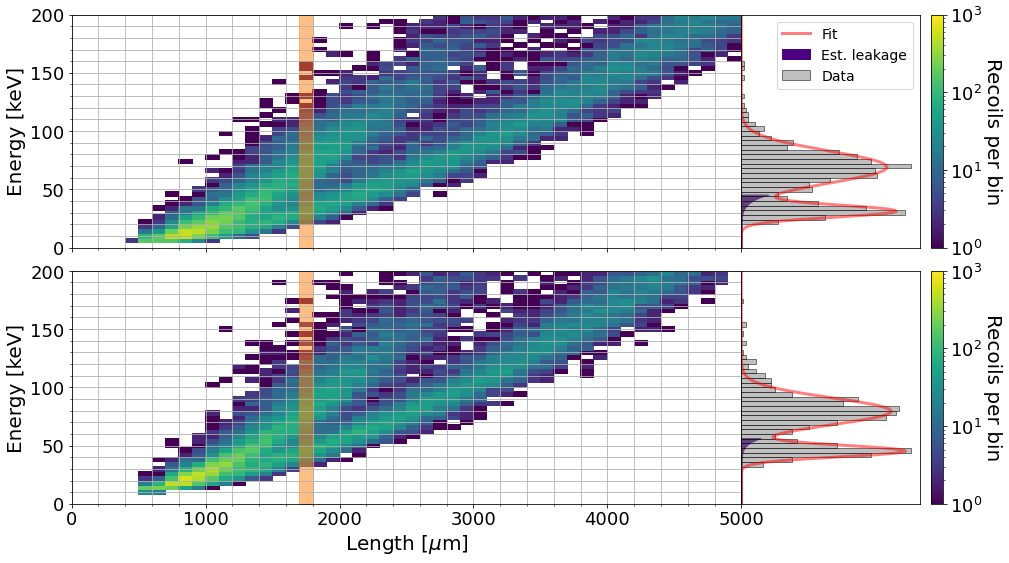

In [150]:
def gauss(x,mu,sigma,A): # for gaussian fit
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2): #Sum of gaussians for bimodal fit
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

x_plt = np.linspace(0,800,801)
bins = 0.5*(yedges[1:]+yedges[:-1])
sig_factor = 2 #Amount of sigmas away from Helium peak to define cutoff of leakage region

for tpc in ['tako']:
    for loc in range(17,18):
        ekey = 'track_energy'
        index_He = uncorrected_red[tpc].loc[(uncorrected_red[tpc]['length'] < (xedges[loc+1])) & (uncorrected_red[tpc]['length'] > (xedges[loc]))].index.to_numpy()
        index_CO = uncorrected_recoils[tpc].loc[(uncorrected_recoils[tpc].index.isin(index_He) == False) & (uncorrected_recoils[tpc]['length'] < (xedges[loc+1])) & (uncorrected_recoils[tpc]['length'] > (xedges[loc]))].index.to_numpy()
        plt.rc('legend', fontsize=14)
        plt.rc('xtick', labelsize=18)
        plt.rc('ytick', labelsize=18)
        plt.rc('axes', labelsize=20)
        plt.rc('axes', titlesize=20)
        fig, ax = plt.subplots(2,2, figsize = (16,9), gridspec_kw={'hspace': 0.1, 'wspace': 0, 'width_ratios': [3, 1]})
        h[tpc + '_uncor'], xedges, yedges, image[tpc + '_uncor'] = ax[0,0].hist2d(uncorrected_recoils[tpc]['length'], uncorrected_recoils[tpc][ekey], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
        plt.colorbar(image[tpc+'_uncor'], ax=[ax[0,1]]).set_label(r'Recoils per bin', rotation = 270, labelpad = 20)
        ax[0,0].set_xticklabels([])
        ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
        ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
        ax[0,0].set_xlim(0,xm)
        ax[0,0].fill_between(np.array([xedges[loc], xedges[loc+1]]), 0, ym, alpha = 0.5, color = 'tab:orange')
        ax[0,0].set_ylim(0,200)
        ax[0,0].set_xlim(0,5000)
        ax[0,0].set_ylabel(r'Energy [keV]')
        ax[0,0].grid(which='both')
        par1 = uncorrected_red[tpc][ekey][index_He].mean()
        par2 = uncorrected_red[tpc][ekey][index_He].std()
        par3 = len(uncorrected_red[tpc][ekey][index_He])
        par4 = uncorrected_recoils[tpc][ekey][index_CO].mean()
        par5 = uncorrected_recoils[tpc][ekey][index_CO].std()
        par6 = len(uncorrected_recoils[tpc][ekey][index_CO])
        seed_params = [par1,par2,par3,par4,par5,par6]
        htest, xe, ye = np.histogram2d(uncorrected_recoils[tpc].loc[uncorrected_recoils[tpc][ekey]>(par1+sig_factor*par2)]['length'], uncorrected_recoils[tpc].loc[uncorrected_recoils[tpc][ekey]>(par1+sig_factor*par2)][ekey], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)))
        params , cov = curve_fit(bimodal, bins, h[tpc+'_uncor'][loc], seed_params)
        gparams, gcov = curve_fit(gauss, bins, htest[loc], [par4,par5,par6])
        ax[0,1].plot(bimodal(x_plt,*params),x_plt,color='red',lw=3,label='Fit', alpha = 0.5)
        leak_plt = np.linspace(0,par1+sig_factor*par2,1000)
        ax[0,1].barh(bins, h[tpc+'_uncor'][loc], height = ym/nbinsy, alpha = 0.5, color = 'gray', label = 'Data',edgecolor = 'black')
        ax[0,1].fill_betweenx(leak_plt, 0, gauss(leak_plt,*gparams), color = 'indigo', label = 'Est. leakage')
        ax[0,1].set_ylim(0,200)
        #ax[0,1].set_xlim(0,220)
        ax[0,1].set_yticks([])
        ax[0,1].set_xticks([])
        ax[0,1].legend()

        ekey = 'full_corrected_energy'
        index_He = corrected_red[tpc].loc[(corrected_red[tpc]['length'] < (xedges[loc+1])) & (corrected_red[tpc]['length'] > (xedges[loc]))].index.to_numpy()
        index_CO = corrected_recoils[tpc].loc[(corrected_recoils[tpc].index.isin(index_He) == False) & (corrected_recoils[tpc]['length'] < (xedges[loc+1])) & (corrected_recoils[tpc]['length'] > (xedges[loc]))].index.to_numpy()
        h[tpc + '_cor'], xedges, yedges, image[tpc + '_cor'] = ax[1,0].hist2d(corrected_recoils[tpc]['length'], corrected_recoils[tpc][ekey], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
        plt.colorbar(image[tpc+'_cor'], ax=[ax[1,1]]).set_label(r'Recoils per bin', rotation = 270, labelpad = 20)
        ax[1,0].set_xticks([0,1000,2000,3000,4000, 5000, 6000])
        ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
        ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
        ax[1,0].set_xlim(0,xm)
        ax[1,0].fill_between(np.array([xedges[loc], xedges[loc+1]]), 0, ym, alpha = 0.5, color = 'tab:orange')
        ax[1,0].set_ylim(0,200)
        ax[1,0].set_xlim(0,5000)
        ax[1,0].set_xlabel(r'Length [$\mu$m]')
        ax[1,0].set_ylabel(r'Energy [keV]')
        ax[1,0].grid(which='both')
        par1 = corrected_red[tpc][ekey][index_He].mean()
        par2 = corrected_red[tpc][ekey][index_He].std()
        par3 = len(corrected_red[tpc][ekey][index_He])
        par4 = corrected_recoils[tpc][ekey][index_CO].mean()
        par5 = corrected_recoils[tpc][ekey][index_CO].std()
        par6 = len(corrected_recoils[tpc][ekey][index_CO])
        seed_params = [par1,par2,par3,par4,par5,par6]
        htest, xe, ye = np.histogram2d(corrected_recoils[tpc].loc[corrected_recoils[tpc][ekey]>(par1+sig_factor*par2)]['length'], corrected_recoils[tpc].loc[corrected_recoils[tpc][ekey]>(par1+sig_factor*par2)][ekey], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)))
        params , cov = curve_fit(bimodal, bins, h[tpc+'_cor'][loc], seed_params)
        gparams, gcov = curve_fit(gauss, bins, htest[loc], [par4,par5,par6])
        ax[1,1].plot(bimodal(x_plt,*params),x_plt,color='red',lw=3,label='fit', alpha = 0.5)
        leak_plt = np.linspace(0,par1+sig_factor*par2,1000)
        ax[1,1].fill_betweenx(leak_plt, 0, gauss(leak_plt,*gparams), color = 'indigo')
        ax[1,1].barh(bins, h[tpc+'_cor'][loc], height = ym/nbinsy, alpha = 0.5, color = 'gray', edgecolor = 'black')
        ax[1,1].set_ylim(0,200)
        #ax[1,1].set_xlim(0,220)
        ax[1,1].set_yticks([])
        ax[1,1].set_xticks([])
#plt.savefig('money2.png')
plt.show()

### Generate a bunch of plots for validation

In [151]:
def gauss(x,mu,sigma,A): # for gaussian fit
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2): #Sum of gaussians for bimodal fit
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

x_plt = np.linspace(0,800,801)
bins = 0.5*(yedges[1:]+yedges[:-1])

for tpc in ['iiwi', 'nene', 'tako', 'palila']:
    for loc in range(10,14):
        ekey = 'track_energy'
        index_He = uncorrected_red[tpc].loc[(uncorrected_red[tpc]['length'] < (xedges[loc+1])) & (uncorrected_red[tpc]['length'] > (xedges[loc]))].index.to_numpy()
        index_CO = uncorrected_recoils[tpc].loc[(uncorrected_recoils[tpc].index.isin(index_He) == False) & (uncorrected_recoils[tpc]['length'] < (xedges[loc+1])) & (uncorrected_recoils[tpc]['length'] > (xedges[loc]))].index.to_numpy()
        fig, ax = plt.subplots(2,2, figsize = (8,7), gridspec_kw={'hspace': 0.1, 'wspace': 0, 'width_ratios': [3, 1]})
        ax[0,0].hist2d(uncorrected_recoils[tpc]['length'], uncorrected_recoils[tpc][ekey], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=None))
        plt.colorbar(image[tpc+'_uncor'], ax=[ax[0,1]]).set_label(r'Recoils per bin', rotation = 270, labelpad = 20)
        ax[0,0].set_xticklabels([])
        ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
        ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
        ax[0,0].set_xlim(0,xm)
        ax[0,0].fill_between(np.array([xedges[loc], xedges[loc+1]]), 0, ym, alpha = 0.5, color = 'tab:orange')
        ax[0,0].set_ylim(0,ym)
        ax[0,0].set_ylabel(r'Energy [keV]')
        ax[0,0].grid(which='both')
        par1 = uncorrected_red[tpc][ekey][index_He].mean()
        par2 = uncorrected_red[tpc][ekey][index_He].std()
        par3 = len(uncorrected_red[tpc][ekey][index_He])
        par4 = uncorrected_recoils[tpc][ekey][index_CO].mean()
        par5 = uncorrected_recoils[tpc][ekey][index_CO].std()
        par6 = len(uncorrected_recoils[tpc][ekey][index_CO])
        print(loc, par3, par6)
        seed_params = [par1,par2,par3,par4,par5,par6]
        ax[0,1].barh(bins, h[tpc+'_uncor'][loc], height = ym/nbinsy)
        if 2*par6 < par3 and par6 < 30:
            if par3>20:
                seed_params = [uncorrected_recoils[tpc][ekey].mean(),uncorrected_recoils[tpc][ekey].std(),len(uncorrected_recoils[tpc][ekey])]
                try:
                    params , cov = curve_fit(gauss, bins, h[tpc+'_uncor'][loc], seed_params)
                    ax[0,1].plot(gauss(x_plt,*params),x_plt,color='red',lw=1,label='fit')
                except RuntimeError:
                    pass
            else:
                pass
        else:
            if par3>20:
                try:
                    params , cov = curve_fit(bimodal, bins, h[tpc+'_uncor'][loc], seed_params)
                    ax[0,1].plot(bimodal(x_plt,*params),x_plt,color='red',lw=1,label='fit')
                except RuntimeError:
                    pass
            else:
                pass
        ax[0,1].set_ylim(0,ym)
        ax[0,1].set_yticks([])
        ax[0,1].set_xticks([])

        ekey = 'full_corrected_energy'
        index_He = corrected_red[tpc].loc[(corrected_red[tpc]['length'] < (xedges[loc+1])) & (corrected_red[tpc]['length'] > (xedges[loc]))].index.to_numpy()
        index_CO = corrected_recoils[tpc].loc[(corrected_recoils[tpc].index.isin(index_He) == False) & (corrected_recoils[tpc]['length'] < (xedges[loc+1])) & (corrected_recoils[tpc]['length'] > (xedges[loc]))].index.to_numpy()
        ax[1,0].hist2d(corrected_recoils[tpc]['length'], corrected_recoils[tpc][ekey], bins = (nbinsx,nbinsy), range = ((0,xm),(0,ym)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=None))
        plt.colorbar(image[tpc+'_cor'], ax=[ax[1,1]]).set_label(r'Recoils per bin', rotation = 270, labelpad = 20)
        ax[1,0].set_xticks([0,2000,4000,6000,8000])
        ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
        ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
        ax[1,0].set_xlim(0,xm)
        ax[1,0].fill_between(np.array([xedges[loc], xedges[loc+1]]), 0, ym, alpha = 0.5, color = 'tab:orange')
        ax[1,0].set_ylim(0,ym)
        ax[1,0].set_xlabel(r'Length [$\mu$m]')
        ax[1,0].set_ylabel(r'Energy [keV]')
        ax[1,0].grid(which='both')
        par1 = corrected_red[tpc][ekey][index_He].mean()
        par2 = corrected_red[tpc][ekey][index_He].std()
        par3 = len(corrected_red[tpc][ekey][index_He])
        par4 = corrected_recoils[tpc][ekey][index_CO].mean()
        par5 = corrected_recoils[tpc][ekey][index_CO].std()
        par6 = len(corrected_recoils[tpc][ekey][index_CO])
        print(loc, par3, par6)
        seed_params = [par1,par2,par3,par4,par5,par6]
        if 2*par6 < par3 and par6 < 30:
            if par3 > 20:
                seed_params = [corrected_recoils[tpc][ekey].mean(),corrected_recoils[tpc][ekey].std(),len(corrected_recoils[tpc][ekey])]
                try:
                    params , cov = curve_fit(gauss, bins, h[tpc+'_cor'][loc], seed_params)
                    ax[1,1].plot(gauss(x_plt,*params),x_plt,color='red',lw=1,label='fit')
                except RuntimeError:
                    pass
            else:
                pass
        else:
            if par3 > 20:
                try:
                    params , cov = curve_fit(bimodal, bins, h[tpc+'_cor'][loc], seed_params)
                    ax[1,1].plot(bimodal(x_plt,*params),x_plt,color='red',lw=1,label='fit')
                except RuntimeError:
                    pass
        ax[1,1].barh(bins, h[tpc+'_cor'][loc], height = ym/nbinsy)
        ax[1,1].set_ylim(0,ym)
        ax[1,1].set_yticks([])
        ax[1,1].set_xticks([])
        plt.savefig('%s_hist_%s.png'%(tpc, loc))
        plt.clf()

10 0 380
10 266 114
11 4 357
11 262 99
12 18 268
12 187 99
13 22 252
13 133 141
10 0 395
10 14 381
11 0 354
11 28 326


/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


12 2 342
12 56 288
13 17 314
13 54 277
10 399 1069
10 258 1209
11 325 870
11 239 954


/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


12 341 759
12 293 807
13 280 694
13 253 718
10 0 641
10 95 546
11 0 618
11 150 467


/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


12 13 492
12 166 339
13 51 481
13 170 362


<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

<Figure size 576x504 with 0 Axes>

In [152]:
import scipy.integrate as integrate

def get_resolution_and_leakage(xmax = 10000, ymax = 800, nbinsx = 100, nbinsy = 200, tpcs = ['iiwi', 'nene', 'tako', 'palila']):
    def gauss(x,mu,sigma,A): # for gaussian fit
        return A*exp(-(x-mu)**2/2/sigma**2)
    def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2): #Sum of gaussians for bimodal fit
        return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)
    h = {}
    image = {}
    reso_dfs = {}
    sig_factor = 2
    for tpc in tpcs:
        resolution = {}
        h[tpc+'_uncor'], xedges, yedges, image[tpc+'_uncor'] = plt.hist2d(uncorrected_recoils[tpc]['length'], uncorrected_recoils[tpc]['track_energy'], bins = (nbinsx,nbinsy), range = ((0,xmax),(0,ymax)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
        h[tpc+'_cor'], xedges, yedges, image[tpc+'_cor'] = plt.hist2d(corrected_recoils[tpc]['length'], corrected_recoils[tpc]['full_corrected_energy'], bins = (nbinsx,nbinsy), range = ((0,xmax),(0,ymax)), norm = matplotlib.colors.LogNorm(vmin=1, vmax=1000))
        plt.clf()
        bins = 0.5*(yedges[1:]+yedges[:-1])
        resolution['length'] = []
        resolution['energy_uncor'] = []
        resolution['energy_uncor_err'] = []
        resolution['energy_cor'] = []
        resolution['energy_cor_err'] = []
        resolution['reso_uncor'] = []
        resolution['reso_uncor_err'] = []
        resolution['reso_cor'] = []
        resolution['reso_cor_err'] = []
        resolution['leakage_uncor'] = [] #leakage from C/O band into He band
        resolution['leakage_cor'] = []
        resolution['leakage_uncor_err'] = []
        resolution['leakage_cor_err'] = []
        dx = xedges[1]-xedges[0]
        imin = int(1000/dx)
        imax = nbinsx
        for i in range(imin,imax):
            resolution['length'].append((xedges[i+1]+xedges[i])/2)
            for ekey in ['track_energy', 'full_corrected_energy']:
                if ekey == 'track_energy':
                    df = uncorrected_recoils[tpc]
                    df_red = uncorrected_red[tpc]
                else:
                    df = corrected_recoils[tpc]
                    df_red = corrected_red[tpc]
                index_He = df_red.loc[(df_red['length'] < (xedges[i+1])) & (df_red['length'] > (xedges[i]))].index.to_numpy()
                index_CO = df.loc[(df.index.isin(index_He) == False) & (df['length'] < (xedges[i+1])) & (df['length'] > (xedges[i]))].index.to_numpy()
                par1 = df_red[ekey][index_He].mean()
                par2 = df_red[ekey][index_He].std()
                par3 = len(df_red[ekey][index_He])
                par4 = df[ekey][index_CO].mean()
                par5 = df[ekey][index_CO].std()
                par6 = len(df[ekey][index_CO])
                seed_params = [par1,par2,par3,par4,par5,par6]
                if 2*par6 < par3 and par6 < 30:
                    if par3>30:
                        seed_params = [df[ekey].mean(),df[ekey].std(),len(df[ekey])]
                        try:
                            if ekey == 'track_energy':
                                params , cov = curve_fit(gauss, bins, h[tpc+'_uncor'][i], seed_params)
                                reso = params[1]/params[0]
                                sigma = np.sqrt(np.diag(cov))
                                energy = params[0]
                                energy_err = 1.96*params[1]/np.sqrt(par3)
                                reso_err = reso*np.sqrt((sigma[1]/params[1])**2+(sigma[0]/params[0]))
                                resolution['reso_uncor'].append(reso)
                                resolution['reso_uncor_err'].append(reso_err)
                                resolution['energy_uncor'].append(energy)
                                resolution['energy_uncor_err'].append(energy_err)
                                resolution['leakage_uncor'].append(np.nan)
                                resolution['leakage_uncor_err'].append(np.nan)
                            else:
                                params , cov = curve_fit(gauss, bins, h[tpc+'_cor'][i], seed_params)
                                reso = params[1]/params[0]
                                sigma = np.sqrt(np.diag(cov))
                                energy = params[0]
                                energy_err = 1.96*params[1]/np.sqrt(par3)
                                reso_err = reso*np.sqrt((sigma[1]/params[1])**2+(sigma[0]/params[0]))
                                resolution['reso_cor'].append(reso)
                                resolution['reso_cor_err'].append(reso_err)
                                resolution['energy_cor'].append(energy)
                                resolution['energy_cor_err'].append(energy_err)
                                resolution['leakage_cor'].append(np.nan)
                                resolution['leakage_cor_err'].append(np.nan)
                        except RuntimeError:
                            if ekey == 'track_energy':
                                resolution['reso_uncor'].append(np.nan)
                                resolution['reso_uncor_err'].append(np.nan)
                                resolution['energy_uncor'].append(np.nan)
                                resolution['energy_uncor_err'].append(np.nan)
                                resolution['leakage_uncor'].append(np.nan)
                                resolution['leakage_uncor_err'].append(np.nan)
                            else:
                                resolution['reso_cor'].append(np.nan)
                                resolution['reso_cor_err'].append(np.nan)
                                resolution['energy_cor'].append(np.nan)
                                resolution['energy_cor_err'].append(np.nan)
                                resolution['leakage_cor'].append(np.nan)
                                resolution['leakage_cor_err'].append(np.nan)
                    else:
                        if ekey == 'track_energy':
                            resolution['reso_uncor'].append(np.nan)
                            resolution['reso_uncor_err'].append(np.nan)
                            resolution['energy_uncor'].append(np.nan)
                            resolution['energy_uncor_err'].append(np.nan)
                            resolution['leakage_uncor'].append(np.nan)
                            resolution['leakage_uncor_err'].append(np.nan)
                        else:
                            resolution['reso_cor'].append(np.nan)
                            resolution['reso_cor_err'].append(np.nan)
                            resolution['energy_cor'].append(np.nan)
                            resolution['energy_cor_err'].append(np.nan)
                            resolution['leakage_cor'].append(np.nan)
                            resolution['leakage_cor_err'].append(np.nan)
                else:
                    if par3>30:
                        try:
                            if ekey == 'track_energy':
                                params , cov = curve_fit(bimodal, bins, h[tpc+'_uncor'][i], seed_params)
                                reso = params[1]/params[0]
                                sigma = np.sqrt(np.diag(cov))
                                energy = params[0]
                                energy_err = 1.96*params[1]/np.sqrt(par3)
                                reso_err = reso*np.sqrt((sigma[1]/params[1])**2+(sigma[0]/params[0]))
                                resolution['reso_uncor'].append(reso)
                                resolution['reso_uncor_err'].append(reso_err)
                                resolution['energy_uncor'].append(energy)
                                resolution['energy_uncor_err'].append(energy_err)
                                leakage = integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[3],params[4],params[5]))[0]/integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[0],params[1],params[2]))[0]
                                leakage_err = leakage*np.sqrt((integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[3],params[4],params[5]))[1]/integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[3],params[4],params[5]))[0])**2+(integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[0],params[1],params[2]))[1]/integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[0],params[1],params[2]))[0])**2)
                                resolution['leakage_uncor'].append(leakage)
                                resolution['leakage_uncor_err'].append(integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[3],params[4],params[5]))[1]/integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[0],params[1],params[2]))[1])
                            else:
                                params , cov = curve_fit(bimodal, bins, h[tpc+'_cor'][i], seed_params)
                                reso = params[1]/params[0]
                                sigma = np.sqrt(np.diag(cov))
                                energy = params[0]
                                energy_err = 1.96*params[1]/np.sqrt(par3)
                                reso_err = reso*np.sqrt((sigma[1]/params[1])**2+(sigma[0]/params[0]))
                                resolution['reso_cor'].append(reso)
                                resolution['reso_cor_err'].append(reso_err)
                                resolution['energy_cor'].append(energy)
                                resolution['energy_cor_err'].append(energy_err)
                                try:
                                    leakage = integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[3],params[4],params[5]))[0]/integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[0],params[1],params[2]))[0]
                                    leakage_err = leakage*np.sqrt((integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[3],params[4],params[5]))[1]/integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[3],params[4],params[5]))[0])**2+(integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[0],params[1],params[2]))[1]/integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[0],params[1],params[2]))[0])**2)
                                except ZeroDivisionError:
                                    leakage = np.nan
                                    leakage_err = np.nan
                                resolution['leakage_cor'].append(leakage)
                                resolution['leakage_cor_err'].append(integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[3],params[4],params[5]))[1]/integrate.quad(gauss, 0, params[0]+sig_factor*params[1], args = (params[0],params[1],params[2]))[1])
                        except RuntimeError:
                            if ekey == 'track_energy':
                                resolution['reso_uncor'].append(np.nan)
                                resolution['reso_uncor_err'].append(np.nan)
                                resolution['energy_uncor'].append(np.nan)
                                resolution['energy_uncor_err'].append(np.nan)
                                resolution['leakage_uncor'].append(np.nan)
                                resolution['leakage_uncor_err'].append(np.nan)
                            else:
                                resolution['reso_cor'].append(np.nan)
                                resolution['reso_cor_err'].append(np.nan)
                                resolution['energy_cor'].append(np.nan)
                                resolution['energy_cor_err'].append(np.nan)
                                resolution['leakage_cor'].append(np.nan)
                                resolution['leakage_cor_err'].append(np.nan)
                    else:
                        if ekey == 'track_energy':
                            resolution['reso_uncor'].append(np.nan)
                            resolution['reso_uncor_err'].append(np.nan)
                            resolution['energy_uncor'].append(np.nan)
                            resolution['energy_uncor_err'].append(np.nan)
                            resolution['leakage_uncor'].append(np.nan)
                            resolution['leakage_uncor_err'].append(np.nan)
                        else:
                            resolution['reso_cor'].append(np.nan)
                            resolution['reso_cor_err'].append(np.nan)
                            resolution['energy_cor'].append(np.nan)
                            resolution['energy_cor_err'].append(np.nan)
                            resolution['leakage_cor'].append(np.nan)
                            resolution['leakage_cor_err'].append(np.nan)
        reso_dfs[tpc] = pd.DataFrame.from_dict(resolution)
    return reso_dfs


### Leakage plot for tako

In [153]:
dfs = get_resolution_and_leakage()
for tpc in dfs.keys():
    dfs[tpc] = dfs[tpc].loc[(np.abs(dfs[tpc]['reso_uncor_err'])<2*np.abs(dfs[tpc]['reso_uncor'])) & (np.abs(dfs[tpc]['reso_cor_err'])<2*np.abs(dfs[tpc]['reso_cor']))]# & (np.abs(dfs[tpc]['leakage_cor'])<.4) & (np.abs(dfs[tpc]['leakage_uncor'])<.40)]

/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/ipykernel_launcher.py:133: RuntimeWarning: invalid value encountered in sqrt
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<Figure size 432x288 with 0 Axes>

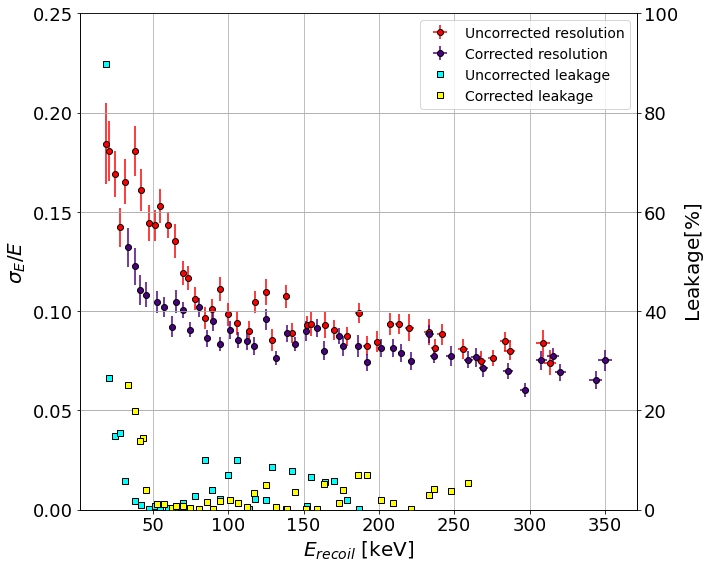

In [212]:
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
for tpc in ['tako']:
    fig, ax = plt.subplots(figsize = (10,8))
    #index = dfs[tpc].loc[dfs[tpc]['length']<10000].index.to_numpy()
    #index = dfs[tpc].index.to_numpy()
    #ax.errorbar(dfs[tpc]['length'],np.abs(dfs[tpc]['reso_uncor']),np.abs(dfs[tpc]['reso_uncor_err']),[0 for i in range(0,len(dfs[tpc]))], 'o', color = 'red', label = 'Uncorrected')
    #p1 = ax.errorbar(dfs[tpc]['length'],np.abs(dfs[tpc]['reso_cor']),np.abs(dfs[tpc]['reso_cor_err']),[0 for i in range(0,len(dfs[tpc]))], 'o', color = 'indigo', label = 'Resolution', markeredgecolor = 'black')
    p1 = ax.errorbar(dfs[tpc]['energy_uncor'],np.abs(dfs[tpc]['reso_uncor']),np.abs(dfs[tpc]['reso_uncor_err']),dfs[tpc]['energy_uncor_err'], 'o', color = 'red', label = 'Uncorrected resolution', markeredgecolor = 'black')
    p2 = ax.errorbar(dfs[tpc]['energy_cor'],np.abs(dfs[tpc]['reso_cor']),np.abs(dfs[tpc]['reso_cor_err']),dfs[tpc]['energy_cor_err'], 'o', color = 'indigo', label = 'Corrected resolution', markeredgecolor = 'black')
    ax.set_ylabel(r'$\sigma_E/E$')
    #ax.set_xlabel(r'length [$\mu$m]')
    #ax.set_xlim(0,7000)
    ax.set_xlabel(r'$E_{recoil}$ [keV]')
    ax.set_xlim(0,400)
    ax.set_ylim(0,0.25)
    ax.grid()
    ax2 = ax.twinx()
    #plt.plot(dfs[tpc]['length'],np.abs(dfs[tpc]['leakage_uncor'])*100, 'o', color = 'red', label = 'Uncorrected')
    #p2 = ax2.plot(dfs[tpc]['length'][index],np.abs(dfs[tpc]['leakage_cor'][index])*100, 's', color = 'blue', label = 'Leakage', markeredgecolor = 'black')
    p3 = ax2.plot(dfs[tpc]['energy_uncor'], np.abs(dfs[tpc]['leakage_uncor'])*100, 's', color = 'cyan', label = 'Uncorrected leakage', markeredgecolor = 'black')
    p4 = ax2.plot(dfs[tpc]['energy_cor'], np.abs(dfs[tpc]['leakage_cor'])*100, 's', color = 'yellow', label = 'Corrected leakage', markeredgecolor = 'black')
    ax2.set_ylabel(r'Leakage[$\%$]')
    #plt.title(tpc)
    ax2.set_ylim(0,100)
    ax2.grid()
    markers = [p1, p2, p3[0], p4[0]]
    plt.legend(markers, [m.get_label() for m in markers])
plt.tight_layout()
#plt.savefig('tako_leakage.png')
plt.show()

### Add simulation

In [204]:
s = pc.simulation()
zmin = 2
zmax = 8
IQF_group, after_thresh_group = s.get_grouped_MC(recoil_species = 'He', zmin = zmin, zmax = zmax) #can add zmin and zmax as 0 and 10 to remove fiducial cuts
after_thresh = s.apply_energy_calibrations(recoil_species = 'He', zmin = zmin, zmax = zmax)[0]

/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeef/anaconda3/envs/root_env/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

### Charge loss after gain
For now do for He only. Possibly make a function to add C and O later if we decide to measure the energy resolution of C/O reocils in data

In [205]:
gain = {'iiwi': 1502, 'nene': 899, 'humu': 878, 'palila': 1033, 'tako': 807, 'elepaio': 797}
W = 35.075
fpath = '~/data/phase3/simulation/resolution_paper/tpc_sims/'
reco_E = {}
truth_E = {}
truth_index = {}
after_gain_raw = {} #dict of dataframes to use, will groupby() truth energies
for tpc in ['tako']:
    '''
    if tpc == 'iiwi':
        energies = np.array([i for i in range (5,29)] + [10*i for i in range(3, 11)] 
+ [120,140,160,180,200,250,300,350,400,450,500,600,700,800])
    elif tpc == 'palila' or tpc == 'nene':
        energies = np.array([i for i in range (5,29)] + [10*i for i in range(3, 11)] 
+ [120,140,160,180,200,250,300,350,400,450,500,600,700,800,900])
    else:
        energies = np.array([i for i in range (5,29)] + [10*i for i in range(3, 11)] 
+ [120,140,160,180,200,250,300,350,400,450,500,600,700,800,900,1000])
    '''
    energies = np.array([i for i in range (5,29)] + [10*i for i in range(3, 11)] 
+ [120,140,160,180,200,250,300,350,400,450,500]) #cap at 500 for now while files generate
    reco_E[tpc] = []
    truth_E[tpc] = []
    truth_index[tpc] = []
    for energy in energies:
        f = ROOT.TFile(fpath + '%s_%s_keV.root'%(tpc, energy))
        charge = []
        for i in range(1,101):
            after_gain = ROOT.TH3D(f.Get("event_fe4_after_gain_proj_0_1_2;%s"%(i)))
            charge.append(after_gain.GetEntries())
            truth_E[tpc].append(energy)
            reco_E[tpc].append(after_gain.GetEntries()*35.075*1e-03/gain[tpc])
            truth_index[tpc].append(i-1)
    after_gain_raw[tpc] = pd.DataFrame()
    after_gain_raw[tpc]['E_truth'] = truth_E[tpc]
    after_gain_raw[tpc]['E_reco'] = reco_E[tpc]
    after_gain_raw[tpc]['truth_index'] = truth_index[tpc]


### Use truth indices to find after gain events that should be removed due to fiducial cuts

In [206]:
for tpc in ['tako']:
    energies = after_thresh[tpc]['truth_energy'].unique()
    temp = after_gain_raw[tpc].head(0)
    for e in energies:
        truth_index = after_thresh[tpc].loc[after_thresh[tpc]['truth_energy'] == e]['truth_index'] #after thresh has been subject to fiducial cuts from simulation class
        temp = temp.append(after_gain_raw[tpc].loc[(after_gain_raw[tpc]['E_truth']==e) & (after_gain_raw[tpc]['truth_index'].isin(truth_index)==True)], ignore_index = True)
    after_gain_raw[tpc] = temp

In [207]:
after_gain_group = {}
for tpc in ['tako']:
    after_gain_group[tpc] = after_gain_raw[tpc].groupby('E_truth')

### Plot ratio of ionization energy to truth energy vs truth energy for various stages of the event

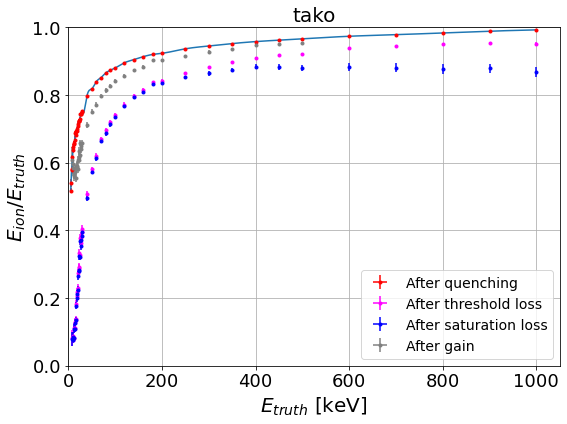

In [208]:
from scipy.interpolate import interp1d
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)
plt.figure(figsize = (8,6))
x_plt = np.linspace(-10,110,121)
plt.errorbar(IQF_group['tako'].mean().index,
                 IQF_group['tako'].mean()['truth_charge']*35.075*1e-03/IQF_group['tako'].mean().index,
                 IQF_group['tako'].sem()['truth_charge']*35.075*1e-03/IQF_group['tako'].mean().index,
                 [0 for i in range(0,len(IQF_group['tako'].mean()))],
                 'o',markersize = 3, label = r'After quenching', color = 'red')

plt.errorbar(after_thresh_group['tako'].mean().index,
                 (after_thresh_group['tako'].mean()['qsum']*35.075*1e-03/gain['tako'])/after_thresh_group['tako'].mean().index,
                 (after_thresh_group['tako'].sem()['qsum']*35.075*1e-03/gain['tako'])/after_thresh_group['tako'].mean().index,
                 [0 for i in range(0,len(after_thresh_group['tako'].mean()))],
                 'o',markersize = 3, label = r'After threshold loss', color = 'magenta')

plt.errorbar(after_thresh_group['tako'].mean().index,
                 (after_thresh_group['tako'].mean()['sumtot']*35.075*1e-03/gain['tako'])/after_thresh_group['tako'].mean().index,
                 (after_thresh_group['tako'].sem()['sumtot']*35.075*1e-03/gain['tako'])/after_thresh_group['tako'].mean().index,
                 [0 for i in range(0,len(after_thresh_group['tako'].mean()))],
                 'o',markersize = 3, label = r'After saturation loss', color = 'blue')
plt.errorbar(after_gain_group['tako'].mean().index,
                 (after_gain_group['tako'].mean()['E_reco'])/after_gain_group['tako'].mean().index,
                 (after_gain_group['tako'].sem()['E_reco'])/after_gain_group['tako'].mean().index,
                 [0 for i in range(0,len(after_gain_group['tako'].mean()))],
                 'o',markersize = 3, label = r'After gain', color = 'gray')

f = interp1d(IQF_group['tako'].mean().index, IQF_group['tako'].mean()['truth_charge']*35.075*1e-03/IQF_group['tako'].mean().index, kind = 'cubic')
x = np.linspace(5,1000,100000)
plt.plot(x, f(x))
plt.ylabel(r'$E_{ion}/E_{truth}$')
plt.xlabel(r'$E_{truth}$ [keV]')
plt.ylim(0,1)
plt.xlim(0,1050)
plt.legend(loc ='lower right')
plt.grid()
plt.title('tako')
plt.tight_layout()
plt.show()

### RMS reconstructed energies to get uncertainty in simulation resolution

In [209]:
h_thresh_sat = {}
h_thresh = {}
h_quench = {}
h_gain = {}
vals_thresh_sat = {}
vals_thresh = {}
vals_quench = {}
vals_gain = {}
rms_errors_quench = {}
rms_errors_thresh = {}
rms_errors_thresh_sat = {}
rms_errors_gain = {}

for tpc in ['tako']:
    rms_errors_quench[tpc] = []
    rms_errors_thresh[tpc] = []
    rms_errors_thresh_sat[tpc] = []
    rms_errors_gain[tpc] = []
    for energy in after_thresh[tpc]['truth_energy'].unique(): #thresh and saturation
        h_thresh_sat[tpc+'_'+str(energy)] = ROOT.TH1F('%s_%s'%(tpc,energy), '%s_%s'%(tpc,energy), 21, 0, 100)
        h_thresh[tpc+'_'+str(energy)] = ROOT.TH1F('%s_%s'%(tpc,energy), '%s_%s'%(tpc,energy), 21, 0, 100)
        vals_thresh_sat[tpc+'_'+str(energy)] = array.array('d', after_thresh_group[tpc].mean().loc[after_thresh[tpc]['truth_energy'] == energy]['sumtot']*W*1e-03/gain[tpc])
        vals_thresh[tpc+'_'+str(energy)] = array.array('d', after_thresh_group[tpc].mean().loc[after_thresh[tpc]['truth_energy'] == energy]['qsum']*W*1e-03/gain[tpc])
        for i in range(0,len(vals_thresh_sat[tpc+'_'+str(energy)])):
            h_thresh_sat[tpc+'_'+str(energy)].Fill(vals_thresh_sat[tpc+'_'+str(energy)][i])
        for i in range(0,len(vals_thresh[tpc+'_'+str(energy)])):
            h_thresh[tpc+'_'+str(energy)].Fill(vals_thresh[tpc+'_'+str(energy)][i])
        rms_errors_thresh_sat[tpc].append(h_thresh_sat[tpc+'_'+str(energy)].GetRMSError())
        rms_errors_thresh[tpc].append(h_thresh[tpc+'_'+str(energy)].GetRMSError())
    for energy in after_gain_raw[tpc]['E_truth'].unique(): #gain
        h_gain[tpc+'_'+str(energy)] = ROOT.TH1F('%s_%s'%(tpc,energy), '%s_%s'%(tpc,energy), 21, 0, 100)
        vals_gain[tpc+'_'+str(energy)] = array.array('d', after_gain_group[tpc].mean().loc[after_gain_raw[tpc]['E_truth'] == energy]['E_reco'])
        for i in range(0,len(vals_gain[tpc+'_'+str(energy)])):
            h_gain[tpc+'_'+str(energy)].Fill(vals_gain[tpc+'_'+str(energy)][i])
        rms_errors_gain[tpc].append(h_gain[tpc+'_'+str(energy)].GetRMSError())
    rms_errors_thresh_sat[tpc] = np.array(rms_errors_thresh_sat[tpc])
    rms_errors_thresh[tpc] = np.array(rms_errors_thresh[tpc])
    rms_errors_quench[tpc] = np.array(rms_errors_quench[tpc])
    rms_errors_gain[tpc] = np.array(rms_errors_gain[tpc])

Warning in <TROOT::Append>: Replacing existing TH1: tako_9.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_10.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_11.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_12.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_13.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_14.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_15.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_16.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_17.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_18.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: tako_19.0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existi

In [210]:
reso_errors_thresh_sat = {}
reso_errors_thresh = {}
reso_errors_gain = {}
for tpc in ['tako']:
    reso_errors_thresh[tpc] = (after_thresh_group[tpc].std()['qsum']*35.075*1e-03/gain[tpc])/(after_thresh_group[tpc].mean()['qsum']*35.075*1e-03/gain[tpc]) * np.sqrt((rms_errors_thresh[tpc]/(after_thresh_group[tpc].std()['qsum']*35.075*1e-03)/gain[tpc])**2 + ((after_thresh_group[tpc].std()['qsum']*35.075*1e-03/gain[tpc])/(after_thresh_group[tpc].mean()['qsum']*35.075*1e-03/gain[tpc]))**2)
    reso_errors_thresh_sat[tpc] = (after_thresh_group[tpc].std()['sumtot']*35.075*1e-03/gain[tpc])/(after_thresh_group[tpc].mean()['sumtot']*35.075*1e-03/gain[tpc]) * np.sqrt((rms_errors_thresh_sat[tpc]/(after_thresh_group[tpc].std()['sumtot']*35.075*1e-03)/gain[tpc])**2 + ((after_thresh_group[tpc].std()['sumtot']*35.075*1e-03/gain[tpc])/(after_thresh_group[tpc].mean()['sumtot']*35.075*1e-03/gain[tpc]))**2)
    reso_errors_gain[tpc] = after_gain_group[tpc].std()['E_reco']/(after_gain_group[tpc].mean()['E_reco']) * np.sqrt((rms_errors_gain[tpc]/(after_gain_group[tpc].std()['E_reco'])**2 + ((after_gain_group[tpc].std()['E_reco'])/(after_gain_group[tpc].mean()['E_reco']))**2))

### Removed IQF division from corrected energy. Check with Sven of if I should use that or if I should interpolate based on the corrected energy reco:truth ratio

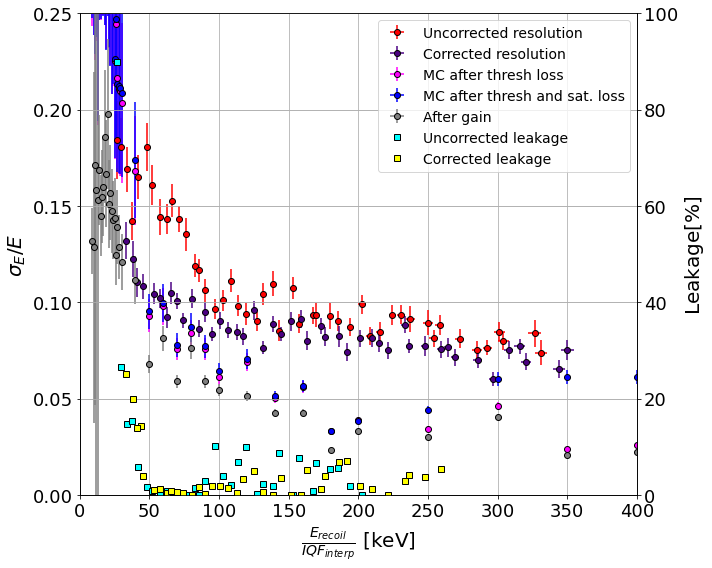

In [211]:

plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
for tpc in ['tako']:
    fig, ax = plt.subplots(figsize = (10,8))
    #index = dfs[tpc].loc[dfs[tpc]['length']<10000].index.to_numpy()
    index = dfs[tpc].index.to_numpy()
    #Divide x axis by interpolation of IQF curve
    p1 = ax.errorbar(dfs[tpc]['energy_uncor']/f(dfs[tpc]['energy_uncor']),np.abs(dfs[tpc]['reso_uncor']),np.abs(dfs[tpc]['reso_uncor_err']),dfs[tpc]['energy_uncor_err']/f(dfs[tpc]['energy_uncor']), 'o', color = 'red', label = 'Uncorrected resolution', markeredgecolor = 'black')
    p2 = ax.errorbar(dfs[tpc]['energy_cor'],np.abs(dfs[tpc]['reso_cor']),np.abs(dfs[tpc]['reso_cor_err']),dfs[tpc]['energy_cor_err'], 'o', color = 'indigo', label = 'Corrected resolution', markeredgecolor = 'black')
    p3 = ax.errorbar(after_thresh_group[tpc].mean().index,
                 (after_thresh_group[tpc].std()['qsum']*35.075*1e-03/gain[tpc])/(after_thresh_group[tpc].mean()['qsum']*35.075*1e-03/gain[tpc]),
                 reso_errors_thresh[tpc], [0 for i in range(0,len(reso_errors_thresh[tpc]))],
                 'o', label = r'MC after thresh loss', color = 'magenta', markeredgecolor = 'black')
    p4 = ax.errorbar(after_thresh_group[tpc].mean().index,
                 (after_thresh_group[tpc].std()['sumtot']*35.075*1e-03/gain[tpc])/(after_thresh_group[tpc].mean()['sumtot']*35.075*1e-03/gain[tpc]),
                 reso_errors_thresh_sat[tpc], [0 for i in range(0,len(reso_errors_thresh_sat[tpc]))],
                 'o', label = r'MC after thresh and sat. loss', color = 'blue', markeredgecolor = 'black')
    p5 = ax.errorbar(after_gain_group['tako'].mean().index,
                 after_gain_group['tako'].std()['E_reco']/after_gain_group['tako'].mean()['E_reco'],
                     reso_errors_gain[tpc], [0 for i in range(0,len(reso_errors_gain[tpc]))],
                 'o', label = r'After gain', color = 'gray', markeredgecolor = 'black')
    ax.set_ylabel(r'$\sigma_E/E$')
    ax.set_xlabel(r'$\frac{E_{recoil}}{IQF_{interp}}$ [keV]')
    ax.set_xlim(0,400)
    ax.set_ylim(0,0.25)
    ax.grid()
    ax2 = ax.twinx()
    p6 = ax2.plot(dfs[tpc]['energy_uncor']/f(dfs[tpc]['energy_uncor']), np.abs(dfs[tpc]['leakage_uncor'])*100, 's', color = 'cyan', label = 'Uncorrected leakage', markeredgecolor = 'black')
    p7 = ax2.plot(dfs[tpc]['energy_cor'], np.abs(dfs[tpc]['leakage_cor'])*100, 's', color = 'yellow', label = 'Corrected leakage', markeredgecolor = 'black')
    ax2.set_ylabel(r'Leakage[$\%$]')
    #plt.title(tpc)
    ax2.set_ylim(0,100)
    ax2.grid()
    markers = [p1, p2, p3, p4, p5, p6[0], p7[0]]
    plt.legend(markers, [m.get_label() for m in markers])
plt.tight_layout()
#plt.savefig('tako_leakage.png')
plt.show()